In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint
import xarray as xr

import micro
import gtsa

import seaborn as sns 
import statsmodels.api as sm

## $\Delta$ Z eCDF plots
- Do not run plots without clearing all cell output first.

In [ ]:
ds_diff_k13_wsyr1_sfm = xr.open_dataset('../data/k13_wsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_dsyr1_sfm = xr.open_dataset('../data/k13_dsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_wsyr2_sfm = xr.open_dataset('../data/k13_wsyr2_diff_sfm.nc').squeeze()

ds_diff_m14_wsyr1_sfm = xr.open_dataset('../data/m14_wsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_dsyr1_sfm = xr.open_dataset('../data/m14_dsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_wsyr2_sfm = xr.open_dataset('../data/m14_wsyr2_diff_sfm.nc').squeeze()

In [ ]:
ds_diff_k13_wsyr1_sfm_2 = ds_diff_k13_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'], inplace=True)

ds_diff_k13_wsyr1_sfm_3 = ds_diff_k13_wsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr1_sfm_4 = ds_diff_k13_wsyr1_sfm.isel(time=4).to_dataframe()
ds_diff_k13_wsyr1_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

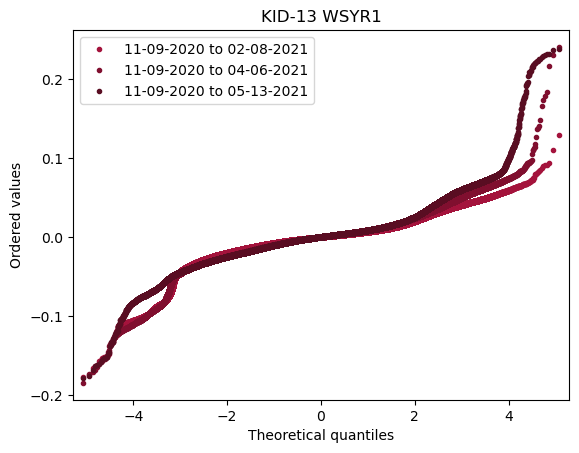

In [12]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_k13_wsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#a4133c', markeredgecolor='#a4133c', label='11-09-2020 to 02-08-2021')
sm.qqplot(ds_diff_k13_wsyr1_sfm_3.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#800f2f', markeredgecolor='#800f2f', label='11-09-2020 to 04-06-2021')
sm.qqplot(ds_diff_k13_wsyr1_sfm_4.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#590d22', markeredgecolor='#590d22', label='11-09-2020 to 05-13-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('KID-13 WSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='11-09-2020 to 02-08-2021')
sns.ecdfplot(ds_diff_k13_wsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#800f2f', label='11-09-2020 to 04-06-2021')
sns.ecdfplot(ds_diff_k13_wsyr1_sfm_4, x='band1', stat='percent', ax=ax, color='#590d22', label='11-09-2020 to 05-13-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 WSYR1')

plt.show()

In [13]:
ds_diff_k13_dsyr1_sfm_2 = ds_diff_k13_dsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_dsyr1_sfm_3 = ds_diff_k13_dsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_k13_dsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

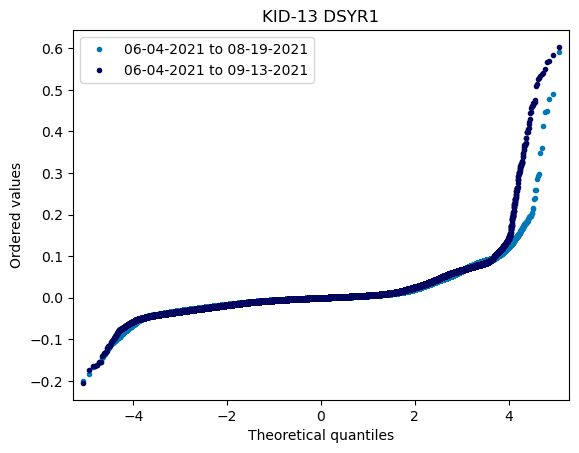

In [14]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_k13_dsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#0077b6', markeredgecolor='#0077b6', label='06-04-2021 to 08-19-2021')
sm.qqplot(ds_diff_k13_dsyr1_sfm_3.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#03045e', markeredgecolor='#03045e', label='06-04-2021 to 09-13-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('KID-13 DSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-04-2021 to 08-19-2021')
sns.ecdfplot(ds_diff_k13_dsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#03045e', label='06-04-2021 to 09-13-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 DSYR1')

plt.show()

In [15]:
ds_diff_k13_wsyr2_sfm_2 = ds_diff_k13_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_3 = ds_diff_k13_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_4 = ds_diff_k13_wsyr2_sfm.isel(time=4).to_dataframe()
ds_diff_k13_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

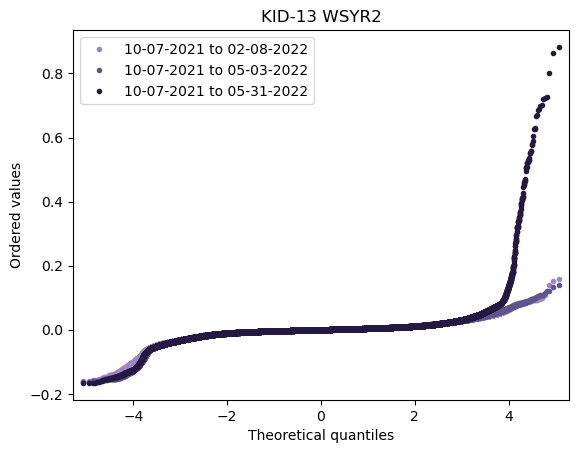

In [17]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_k13_wsyr2_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#9f86c0', markeredgecolor='#9f86c0', label='10-07-2021 to 02-08-2022')
sm.qqplot(ds_diff_k13_wsyr2_sfm_3.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#5e548e', markeredgecolor='#5e548e', label='10-07-2021 to 05-03-2022')
sm.qqplot(ds_diff_k13_wsyr2_sfm_4.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#231942', markeredgecolor='#231942', label='10-07-2021 to 05-31-2022')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('KID-13 WSYR2')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#9f86c0', label='10-07-2021 to 02-08-2022')
sns.ecdfplot(ds_diff_k13_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#5e548e', label='10-07-2021 to 05-03-2022')
sns.ecdfplot(ds_diff_k13_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#231942', label='10-07-2021 to 05-31-2022')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 WSYR2')

plt.show()

In [18]:
ds_diff_m14_wsyr1_sfm_2 = ds_diff_m14_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

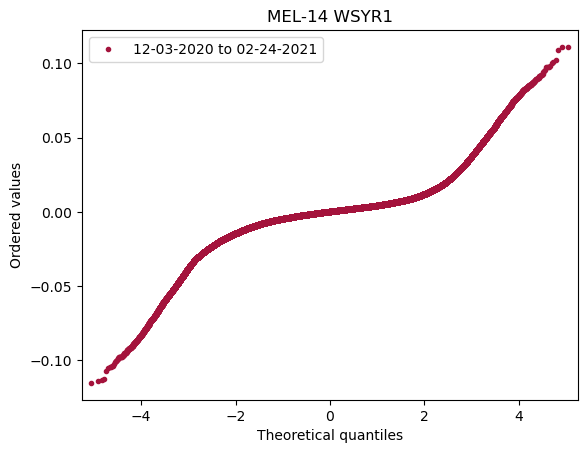

In [19]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_m14_wsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#a4133c', markeredgecolor='#a4133c', label='12-03-2020 to 02-24-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('MEL-14 WSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='12-03-2020 to 02-24-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 WSYR1')

plt.show()

In [20]:
ds_diff_m14_dsyr1_sfm_2 = ds_diff_m14_dsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_m14_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_dsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

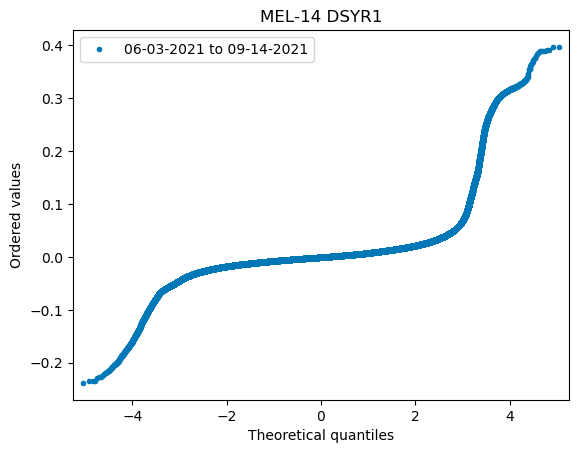

In [21]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_m14_dsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#0077b6', markeredgecolor='#0077b6', label='06-03-2021 to 09-14-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('MEL-14 DSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-03-2021 to 09-14-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 DSYR1')

plt.show()

In [22]:
ds_diff_m14_wsyr2_sfm_2 = ds_diff_m14_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_3 = ds_diff_m14_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_m14_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_3.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_4 = ds_diff_m14_wsyr2_sfm.isel(time=4).to_dataframe()
ds_diff_m14_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_4.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_5 = ds_diff_m14_wsyr2_sfm.isel(time=5).to_dataframe()
ds_diff_m14_wsyr2_sfm_5.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_5.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_5.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_6 = ds_diff_m14_wsyr2_sfm.isel(time=6).to_dataframe()
ds_diff_m14_wsyr2_sfm_6.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_6.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_6.drop(columns=['time','spatial_ref'], inplace=True)

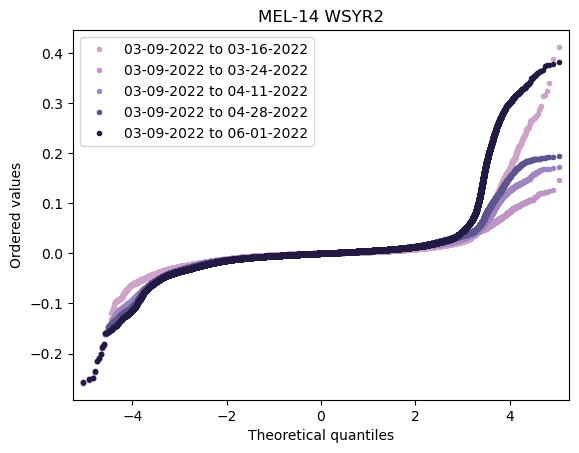

In [23]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_m14_wsyr2_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#CFA3C8', markeredgecolor='#CFA3C8', label='03-09-2022 to 03-16-2022')
sm.qqplot(ds_diff_m14_wsyr2_sfm_3.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#BE95C4', markeredgecolor='#BE95C4', label='03-09-2022 to 03-24-2022')
sm.qqplot(ds_diff_m14_wsyr2_sfm_4.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#9F86C0', markeredgecolor='#9F86C0', label='03-09-2022 to 04-11-2022')
sm.qqplot(ds_diff_m14_wsyr2_sfm_5.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#5E548E', markeredgecolor='#5E548E', label='03-09-2022 to 04-28-2022')
sm.qqplot(ds_diff_m14_wsyr2_sfm_6.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#231942', markeredgecolor='#231942', label='03-09-2022 to 06-01-2022')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('MEL-14 WSYR2')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#CFA3C8', label='03-09-2022 to 03-16-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#BE95C4', label='03-09-2022 to 03-24-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#9F86C0', label='03-09-2022 to 04-11-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_5, x='band1', stat='percent', ax=ax, color='#5E548E', label='03-09-2022 to 04-28-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_6, x='band1', stat='percent', ax=ax, color='#231942', label='03-09-2022 to 06-01-2022')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 WSYR2')

plt.show()